In [9]:
%matplotlib notebook
import prody

In [10]:
pdb = prody.parsePDB('4rvx')

In [11]:
chain_B = pdb.select('chain B and protein')

In [12]:
chain_B

<Selection: 'chain B and protein' from 4rvx (761 atoms)>

In [13]:
chain_A = pdb.select('chain A and protein')

In [28]:
ligand = pdb.select('chain A and not protein and not water')

In [15]:
ligand

<Selection: 'chain A and not protein' from 4rvx (89 atoms)>

<IPython.core.display.Javascript object>


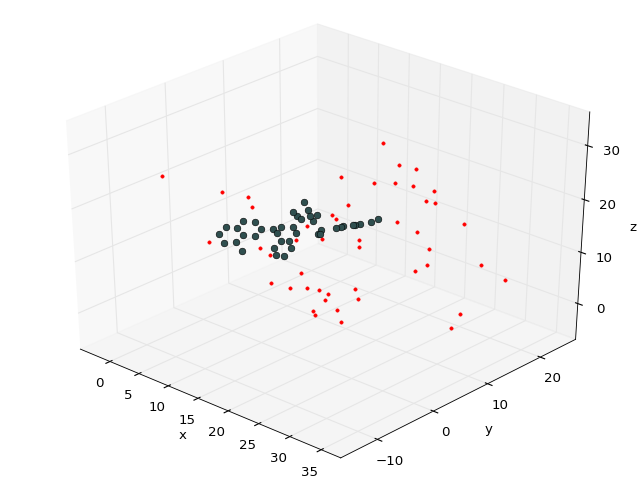

In [17]:
prody.showProtein(ligand)

In [18]:
chain_A_CA = chain_A.select('calpha')

In [19]:
chain_B_CA = chain_B.select('calpha')

In [21]:
anm_A = prody.ANM('chain A')

In [22]:
anm_B = prody.ANM('chain B')

In [59]:
anm_AB = prody.ANM('chain AB')

In [60]:
anm_ABL = prody.ANM('chain AB ligand')

In [61]:
chain_AB = pdb.select('chain A B and protein')

In [62]:
chain_ABL = pdb.select('chain A B and not water')

In [63]:
anm_A.buildHessian(chain_A_CA)

In [64]:
anm_A.getHessian().round(3)

array([[ 9.892, -1.235, -0.296, ...,  0.   ,  0.   ,  0.   ],
       [-1.235,  7.35 , -1.132, ...,  0.   ,  0.   ,  0.   ],
       [-0.296, -1.132,  5.758, ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.   ,  0.   ,  0.   , ...,  2.704,  1.118, -1.828],
       [ 0.   ,  0.   ,  0.   , ...,  1.118,  1.67 , -0.267],
       [ 0.   ,  0.   ,  0.   , ..., -1.828, -0.267,  5.627]])

In [65]:
anm_A.getCutoff()

15.0

In [66]:
anm_A.getGamma()

1.0

In [67]:
anm_A.calcModes()

In [68]:
anm_A.getEigvals().round(3)

array([ 0.656,  0.717,  1.059,  1.19 ,  1.579,  1.872,  1.989,  2.252,
        2.343,  2.647,  3.077,  3.21 ,  3.28 ,  3.456,  3.62 ,  3.766,
        3.879,  3.9  ,  3.92 ,  4.051])

In [69]:
anm_A.getEigvecs().round(3)

array([[ 0.009,  0.03 , -0.006, ..., -0.034,  0.018,  0.012],
       [ 0.011,  0.088, -0.03 , ..., -0.034,  0.035, -0.057],
       [-0.016,  0.021, -0.018, ..., -0.023,  0.058, -0.057],
       ..., 
       [-0.56 , -0.076, -0.228, ...,  0.005,  0.103, -0.055],
       [ 0.712, -0.111, -0.16 , ...,  0.075,  0.066, -0.05 ],
       [-0.174, -0.085, -0.208, ...,  0.182, -0.023, -0.007]])

In [70]:
prody.writeNMD('modes_A.nmd',anm_A[:3],chain_A_CA)

'modes_A.nmd'

In [71]:
prody.setVMDpath('/Applications/VMD 1.9.2.app/Contents/Resources/VMD.app/Contents/MacOS/VMD')

In [72]:
prody.pathVMD()

'/Applications/VMD 1.9.2.app/Contents/Resources/VMD.app/Contents/MacOS/VMD'

In [73]:
prody.viewNMDinVMD('modes_A.nmd')

In [74]:
anm_B.buildHessian(chain_B_CA)

In [75]:
anm_B.calcModes()

In [76]:
prody.writeNMD('modes_B.nmd',anm_B[:3],chain_B_CA)

'modes_B.nmd'

In [77]:
chain_AB_CA = chain_AB.select('calpha')

In [78]:
anm_AB.buildHessian(chain_AB_CA)

In [79]:
anm_AB.calcModes()

In [80]:
prody.writeNMD('modes_AB.nmd',anm_AB[:3],chain_AB_CA)

'modes_AB.nmd'

In [85]:
chain_ABL_back = chain_ABL.select('calpha or not protein')

In [86]:
anm_ABL.buildHessian(chain_ABL_back)

In [87]:
anm_ABL.calcModes()

In [88]:
prody.writeNMD('modes_ABL.nmd',anm_ABL[:3],chain_ABL_back)

'modes_ABL.nmd'

In [89]:
ens = prody.sampleModes(anm_ABL,atoms=chain_ABL_back,n_confs=40,rmsd=2.0)

In [91]:
prody.writeDCD('ABL.dcd',ens)

'ABL.dcd'